# Taxi Fare Prediction


# Import libraries and Dataset needed


In [3]:
import pandas as pd
import numpy as np

# Visualization (for EDA and spotting outliers)
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('taxi_trip_pricing.csv')  # Replace with actual file

# Initial Exploration

In [4]:
#quick view of data
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [5]:
#general information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [6]:
#statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [7]:
#checking for duplicates
df.duplicated().sum()

0

In [8]:
#shape of dataset
df.shape

(1000, 11)

# Handle Missing Values

In [9]:
# Check for missing values
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

<AxesSubplot:>

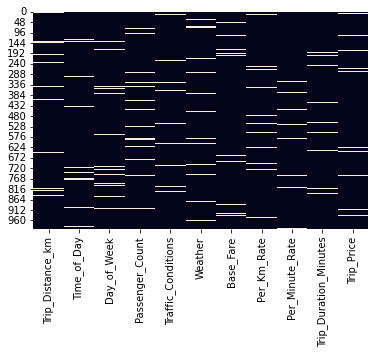

In [10]:
# Visualize missingness
sns.heatmap(df.isnull(), cbar=False)

In [11]:
# Drop or impute missing data
df.dropna(inplace=True)  # Or use fillna() if preferred

# Data Type Checks

In [25]:
# Make sure categorical columns are strings/objects or categories
categorical_cols = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Check data types again
df.dtypes

C:\Users\dellm\anaconda3\envs\TensorFlow-GPU\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Trip_Distance_km          float64
Time_of_Day              category
Day_of_Week              category
Passenger_Count           float64
Traffic_Conditions       category
Weather                  category
Base_Fare                 float64
Per_Km_Rate               float64
Per_Minute_Rate           float64
Trip_Duration_Minutes     float64
Trip_Price                float64
dtype: object

# Handle Outliers

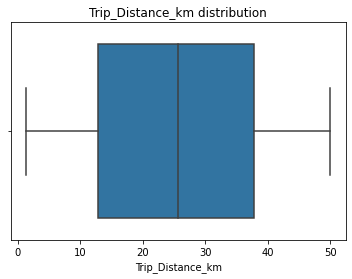

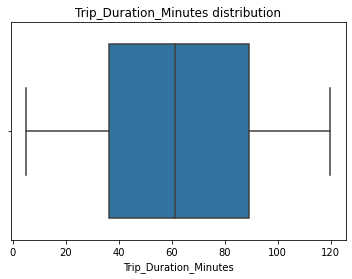

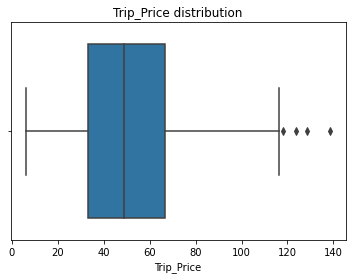

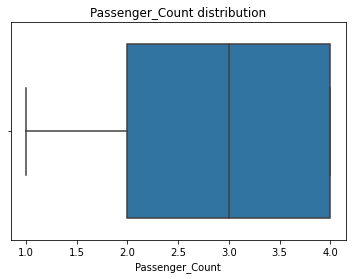

In [28]:
# Plot distributions of numeric columns
num_cols = ['Trip_Distance_km', 'Trip_Duration_Minutes', 'Trip_Price', 'Passenger_Count']

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'{col} distribution')
    plt.show()


Trip_Distance_km: The box plot  shows some points beyond the upper whisker, indicating potential outliers for longer trip distances.

Trip_Duration_Minutes: Similar to trip distance, there are data points exceeding the upper whisker, suggesting potential outliers for longer trip durations.

Trip_Price: We see points outside the whiskers, especially on the higher end, indicating potential outliers for trips with unusually high prices.

Passenger_Count: There might be outliers in this feature as well. For example, if most trips have 1-4 passengers, trips with a significantly higher passenger count could be considered outliers.


In [14]:
#dealing with outliers

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

# Apply to your columns
df_cleaned = remove_outliers_iqr(df, 'Trip_Distance_km')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Trip_Duration_Minutes')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Trip_Price')

In [ ]:
#transform of data -log transformation

df['Trip_Distance_km_log'] = np.log(df['Trip_Distance_km'] + 1)  # +1 to handle zeros
df['Trip_Duration_Minutes_log'] = np.log(df['Trip_Duration_Minutes'] + 1)
df['Trip_Price_log'] = np.log(df['Trip_Price'] + 1)

This  method involves applying mathematical transformations to the data to reduce the impact of outliers. Common transformations include log transformation.

<AxesSubplot:>

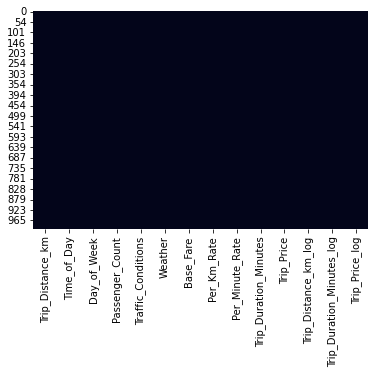

In [17]:
# checking id missing values have been removed 
sns.heatmap(df.isnull(), cbar=False)

All blac areas is an indication that missing values have been taken care of 

In [18]:
# Check for missing values
df.isnull().sum()

Trip_Distance_km             0
Time_of_Day                  0
Day_of_Week                  0
Passenger_Count              0
Traffic_Conditions           0
Weather                      0
Base_Fare                    0
Per_Km_Rate                  0
Per_Minute_Rate              0
Trip_Duration_Minutes        0
Trip_Price                   0
Trip_Distance_km_log         0
Trip_Duration_Minutes_log    0
Trip_Price_log               0
dtype: int64

In [19]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Trip_Distance_km_log,Trip_Duration_Minutes_log,Trip_Price_log
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624,3.013081,4.004055,3.617985
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032,3.634159,3.644666,3.987190
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028,2.265921,4.503470,4.114193
12,41.79,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.1328,3.756304,4.476768,4.490127
14,9.91,Evening,Weekday,2.0,High,Clear,2.32,1.26,0.34,41.72,28.9914,2.389680,3.754667,3.400911
